In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import warnings

In [5]:
df1=pd.read_csv('../data/oasis_longitudinal.csv')
df2=pd.read_csv('../data/oasis_cross-sectional.csv')
df=pd.concat([df1, df2])
df['CDR'] = (df['CDR'] > 0).astype(int)

In [6]:
df=df.drop(columns=['ID']+['Educ']+['Delay']+['Group']+['Subject ID']+['MRI ID'])

In [7]:
df['MR Delay']=df['MR Delay'].fillna(df['MR Delay'].mean())
df['Visit']=df['Visit'].fillna(df['Visit'].mean())
df['SES']=df['SES'].fillna(df['SES'].mean())
df['EDUC']=df['EDUC'].fillna(df['EDUC'].mean())
df['MMSE']=df['MMSE'].fillna(df['MMSE'].mean())
df['eTIV']=df['eTIV'].fillna(df['eTIV'].mean())
df['nWBV']=df['nWBV'].fillna(df['nWBV'].mean())
df['ASF']=df['ASF'].fillna(df['ASF'].mean())

In [8]:
df = df.dropna(subset='CDR')

In [9]:
cat_var_names = ['M/F', 'Hand'] #'Subject ID', 'MRI ID',
#df['Subject ID']=df['Subject ID'].fillna('abc')
#df['MRI ID']=df['MRI ID'].fillna('abc')
df['M/F']=df['M/F'].fillna('abc')
df['Hand']=df['Hand'].fillna('abc')

In [10]:
from sklearn.preprocessing import OneHotEncoder
dummy_e = OneHotEncoder(categories='auto', drop='first', sparse_output=False)
dummy_e.fit(df[cat_var_names]);
dummy_e.categories_
data_num=['MR Delay', 'Visit', 'SES', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']

In [11]:
from sklearn.preprocessing import StandardScaler
norm_e = StandardScaler()
norm_e.fit_transform(df[data_num]).mean(axis=0)

array([ 2.11326350e-16, -3.02348290e-16,  3.29361590e-17, -5.26978543e-17,
       -1.66876539e-16,  1.13080812e-16, -7.02638058e-17, -2.92033943e-16])

In [12]:
print('mean:',norm_e.fit_transform(df[data_num]).mean(axis=0))
print('std:',norm_e.fit_transform(df[data_num]).std(axis=0))

mean: [ 2.11326350e-16 -3.02348290e-16  3.29361590e-17 -5.26978543e-17
 -1.66876539e-16  1.13080812e-16 -7.02638058e-17 -2.92033943e-16]
std: [1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
y = df['CDR']
x = df.drop('CDR', axis =1, inplace=False)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, stratify=y)
print(x_train.shape)

(647, 11)


In [14]:
num_var=['Visit','MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
cat_var=['M/F', 'Hand']#'Subject ID', 'MRI ID', 
x_train_cat = x_train[cat_var]
x_train_num = x_train[num_var]

x_test_cat = x_test[cat_var]
x_test_num = x_test[num_var]

In [15]:
warnings.filterwarnings('ignore')

x_train_dummy = dummy_e.fit_transform(x_train_cat)
x_test_dummy = dummy_e.transform(x_test_cat)

x_train_dummy.shape, x_test_dummy.shape

((647, 1), (162, 1))

In [16]:
# Numerical feature standardization
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean', 
                        copy=True)
# Impute the data
x_train_imp = imputer.fit_transform(x_train_num)
x_test_imp = imputer.transform(x_test_num)

# Check for missing values
np.isnan(x_train_imp).any(), np.isnan(x_test_imp).any()

# normalize
x_train_norm = norm_e.fit_transform(x_train_imp)
x_test_norm = norm_e.transform(x_test_imp)

x_train_norm.shape, x_test_norm.shape

((647, 9), (162, 9))

In [17]:
x_train = np.hstack((x_train_dummy, x_train_norm))
x_test = np.hstack((x_test_dummy, x_test_norm))
x_train.shape

(647, 10)

In [18]:
dummy_e.get_feature_names_out()

array(['M/F_M'], dtype=object)

In [19]:
x_train_norm = pd.DataFrame(x_train_norm)
x_train_norm
x_train_norm.columns = ['Visit','MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF' ]

x_test_norm = pd.DataFrame(x_test_norm)

x_test_norm.columns = ['Visit','MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF' ]
y_train = pd.DataFrame(y_train)
y_train.columns = ['CDR']

y_test = pd.DataFrame(y_test)
y_test.columns = ['CDR']

x_train_norm.to_csv('../data/alzjosh_x_train.csv')
x_test_norm.to_csv('../data/alzjosh_x_test.csv')
y_train.to_csv('../data/alzjosh_y_train.csv')
y_test.to_csv('../data/alzjosh_y_test.csv')

so this is now decision tree

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [38]:
# Initialize model
dt = DecisionTreeClassifier()

# Fit model on the dataset
dt.fit(x_train_norm[['MMSE']], y_train['CDR'])

# Derive the training accuracy score
dt.score(x_train_norm[['MMSE']], y_train['CDR'])

0.8670788253477589

In [40]:
# Test score
dt.score(x_test_norm[['MMSE']], y_test['CDR'])

0.8703703703703703

In [42]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train_norm[['MMSE']], y_train['CDR'])

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'MMSE <= -0.037\ngini = 0.443\nsamples = 100.0%\nvalue = [0.669, 0.331]'),
 Text(0.25, 0.5, 'MMSE <= -0.848\ngini = 0.21\nsamples = 26.0%\nvalue = [0.119, 0.881]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 13.3%\nvalue = [0.0, 1.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.369\nsamples = 12.7%\nvalue = [0.244, 0.756]'),
 Text(0.75, 0.5, 'MMSE <= 0.118\ngini = 0.238\nsamples = 74.0%\nvalue = [0.862, 0.138]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.013\nsamples = 24.0%\nvalue = [0.994, 0.006]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.321\nsamples = 50.1%\nvalue = [0.799, 0.201]')]

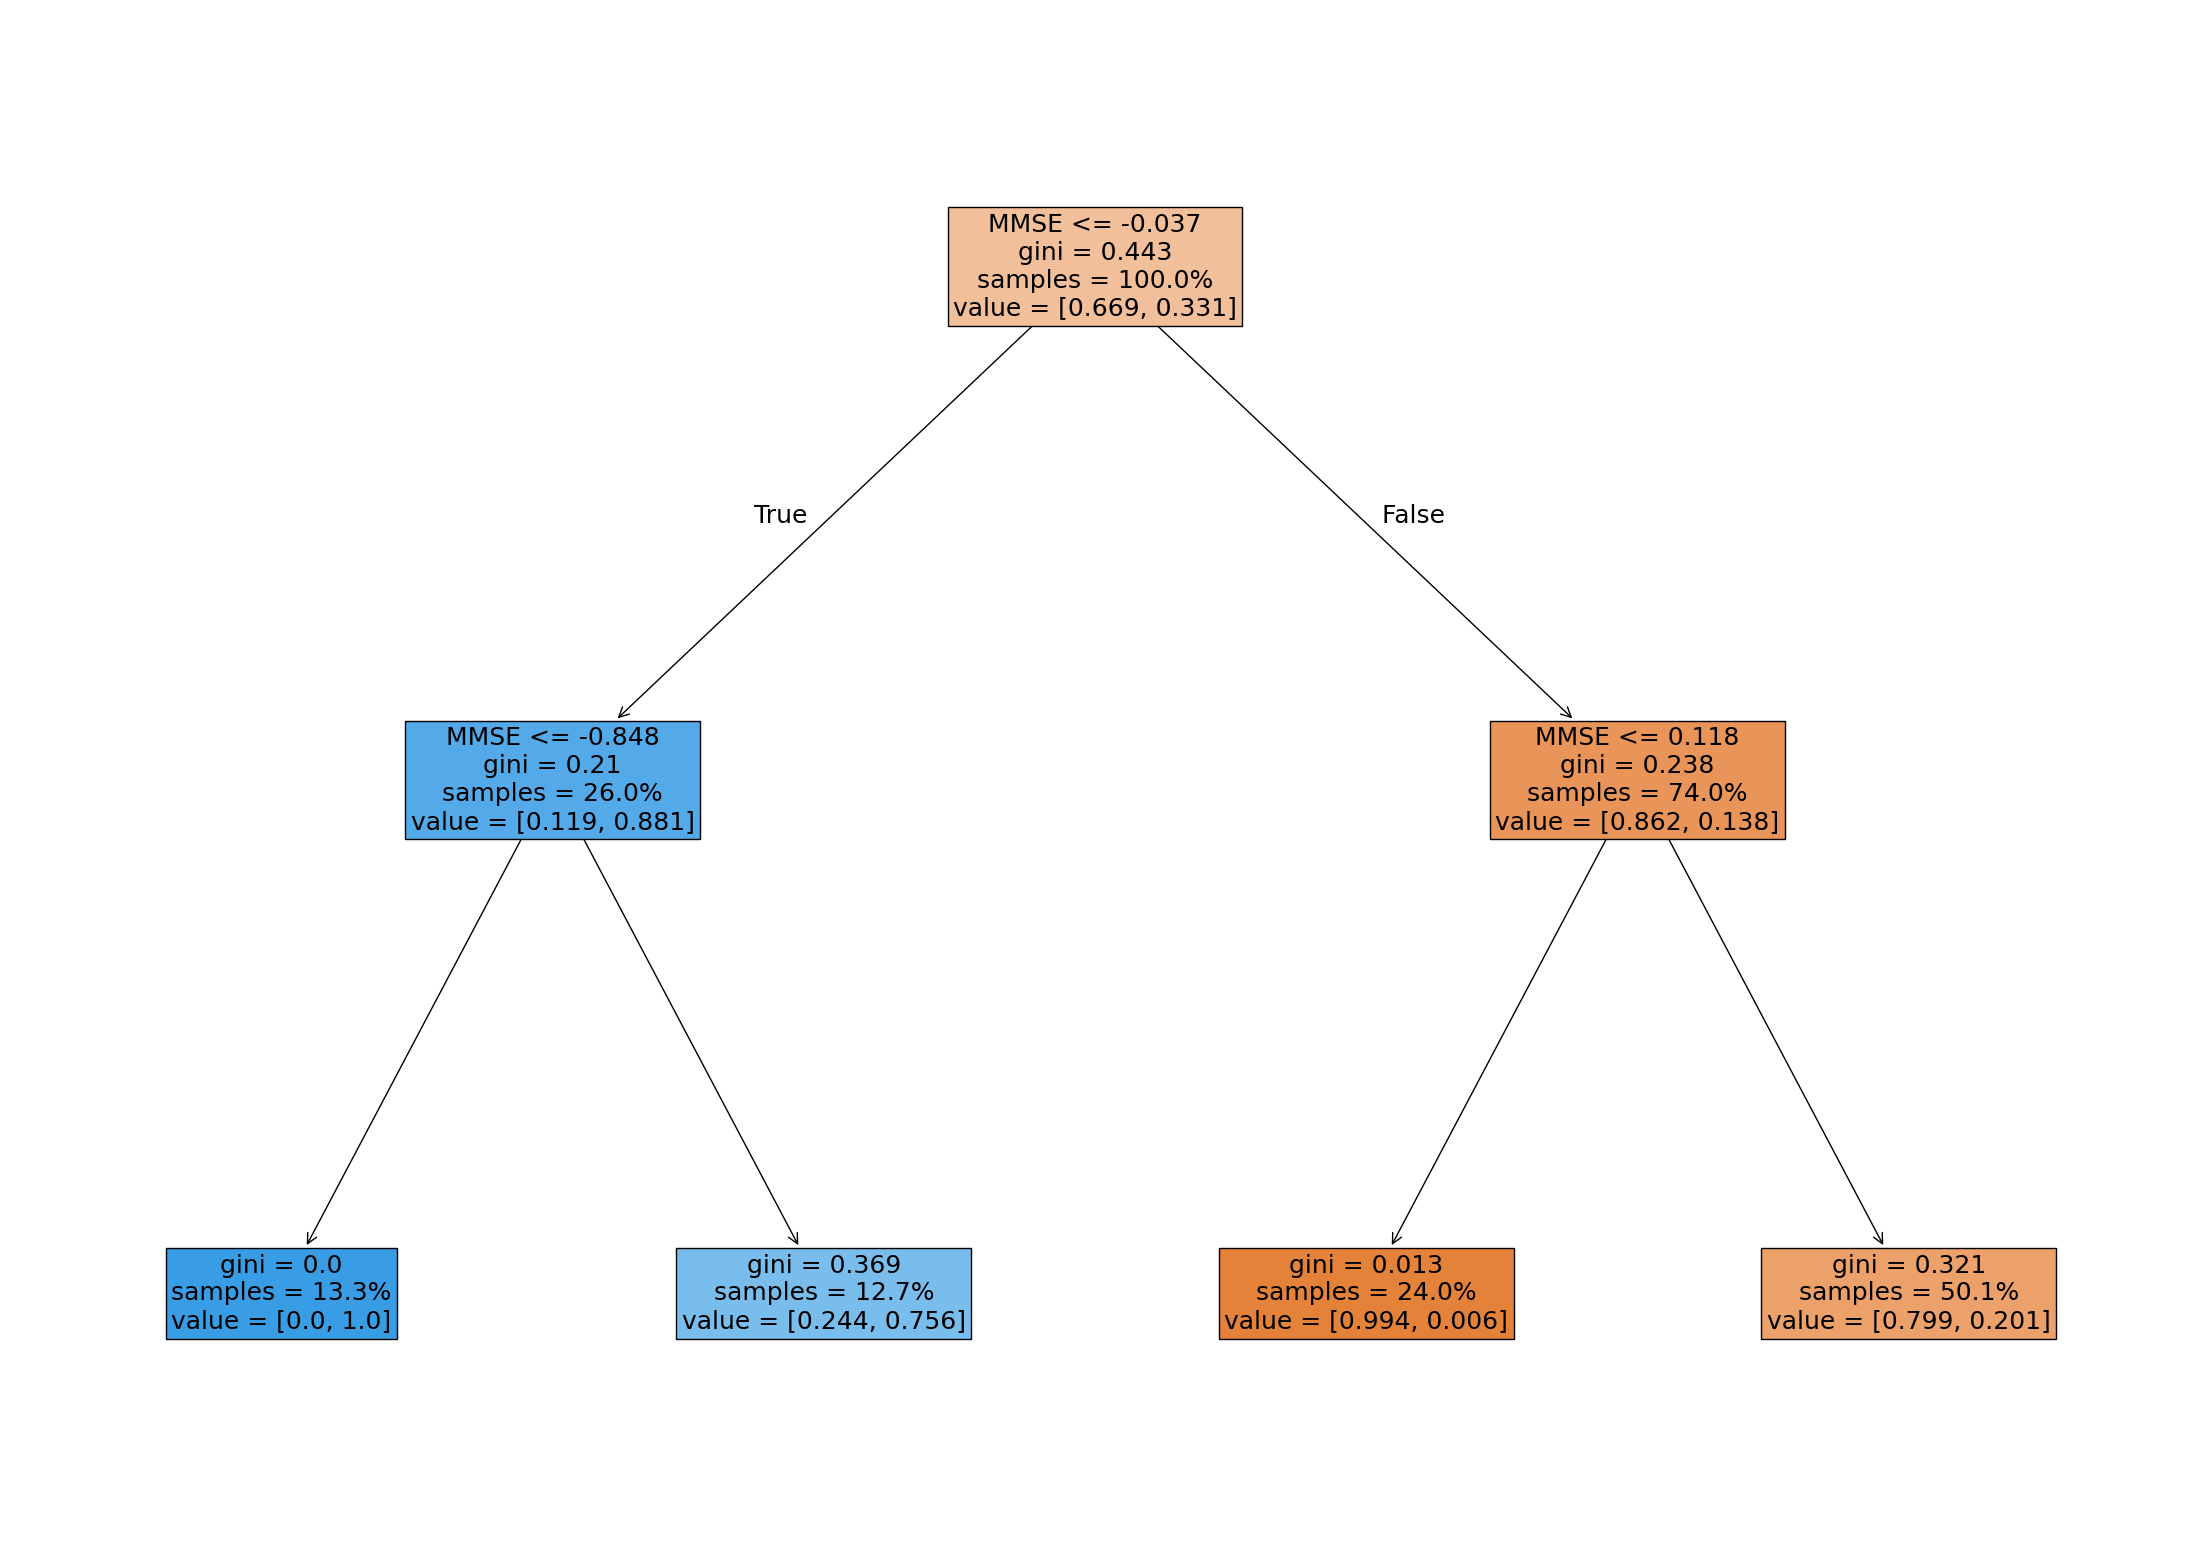

In [46]:
plt.figure(figsize=(28, 20))
plot_tree(dt, feature_names=['MMSE'], 
          filled = True, proportion=True, fontsize=18
         )

In [48]:
# Initialize
dt = DecisionTreeClassifier(max_depth=2)

dt.fit(x_train_norm, y_train['CDR'])

# Evaluate
train_score = dt.score(x_train_norm, y_train['CDR'])
test_score = dt.score(x_test_norm, y_test['CDR'])

print("Our training score is {} and our testing score is {}".format(train_score, test_score))

Our training score is 0.8670788253477589 and our testing score is 0.8703703703703703


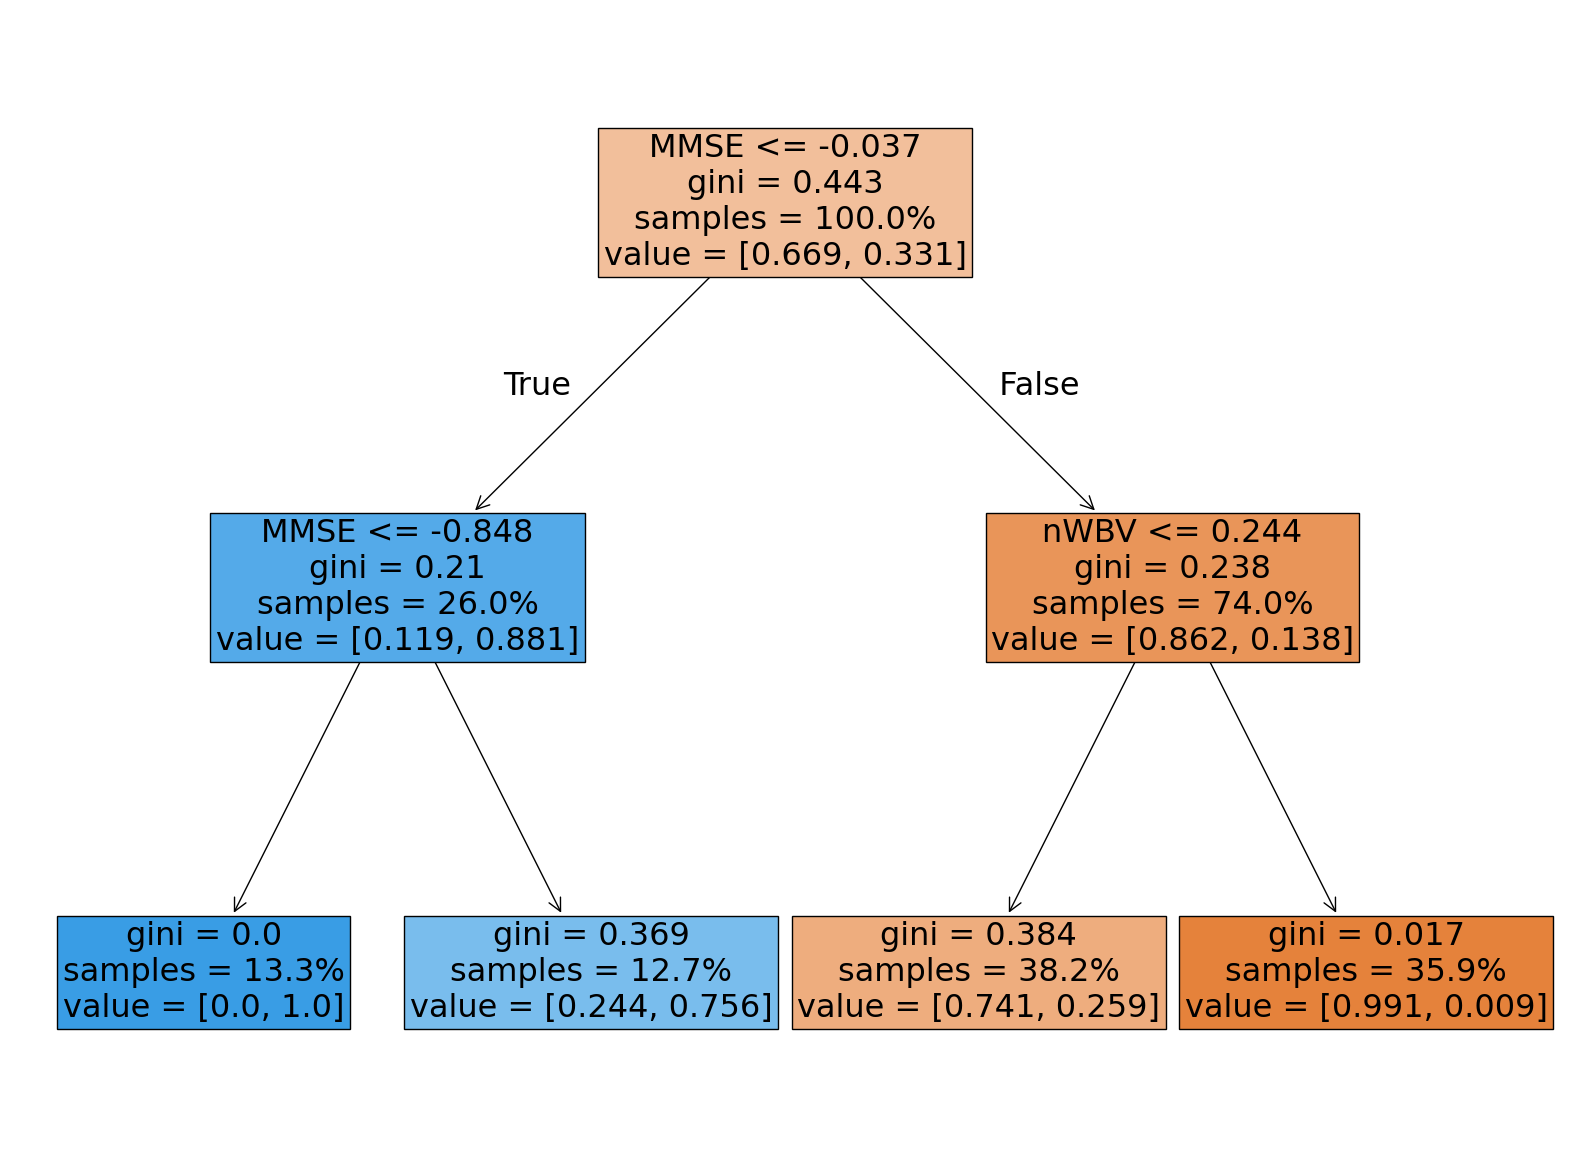

In [62]:
plt.figure(figsize=(20, 15))
plot_tree(dt, feature_names=dt.feature_names_in_,  
          filled = True, proportion=True, fontsize=23
         );